# Geometric Brownian motion and logreturns

## Goals

## Contents
1. [References (Shreve II, Hull)](#references)
1. [Imports and Configuration](#imports-and-configuration)
1. [From SDE to GBM via Ito (theory recap)](#from-sde-to-gbm-using-itô)
1. [Simulation of GBM using simulate_gbm](#simulation-of-gbm-using-simulate_gbm)
1. [Distribution of log S_T (histogram and normal fit)](#distribution-of-log-s_t-histogram-and-normal-fit)
1. [Financial interpretation (returns vs log-returns)](#financial-interpretation)


## References
dawdwa

## Imports and configuration

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from option_pricing import sim_brownian, sim_gbm, plot_sample_paths

## 1: Definition
Standard _geometric Brownian motion_ is  described by the following SDE:
$$dS_t=\mu S_tdt+\sigma S_tdW_t,\quad S_0 > 0,$$
Where
- $\mu$ is the drift term,
- $\sigma$ the volatility,
- $W_t$ standard Brownian motion as defined in notebook 01



## From SDE to GBM using Itô
In order to find a solution, let us consider $X_t = \ln S_t$. Now applying Itô's formule to $dX_t$:
$$dX_t = \frac{1}{S_t}dS_t - \frac{1}{2}\frac{1}{S_t^2}dS_tdS_t (*)$$
Computing $dS_tdS_t = (\mu S_tdt+\sigma S_tdW_t)^2$ using Itô's multiplication rules, we find
$$dS_tdS_t = \sigma^2 S_t^2 dt$$
Substituting this along with our formula for $dS_t$ in $(*)$
$$dX_t = \mu dt + \sigma dW_t - \frac{1}{2}\sigma^2 dt$$
$$dX_t = (\mu - \frac{1}{2}\sigma^2)dt + \sigma dW_t $$
Integrating from 0 to t:
$$X_t = X_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t \rightarrow \ln S_t = \ln S_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t$$
Where taking the exponents gives us the final result:
$$S_t = S_0 \exp((\mu - \frac{1}{2}\sigma^2)t + \sigma W_t)$$

## GBM path simulation
Let's simulate some price paths with the following configuration:

In [35]:
# --- Parameters ---
n_paths = 10000   # number of paths for statistics
steps = 1000
T = 1.0           # End time
dt = T / steps    # timestep

mu = 1            # Mean rate of return
sigma = 1         # Volatility
S0 = 1.0          # Start value

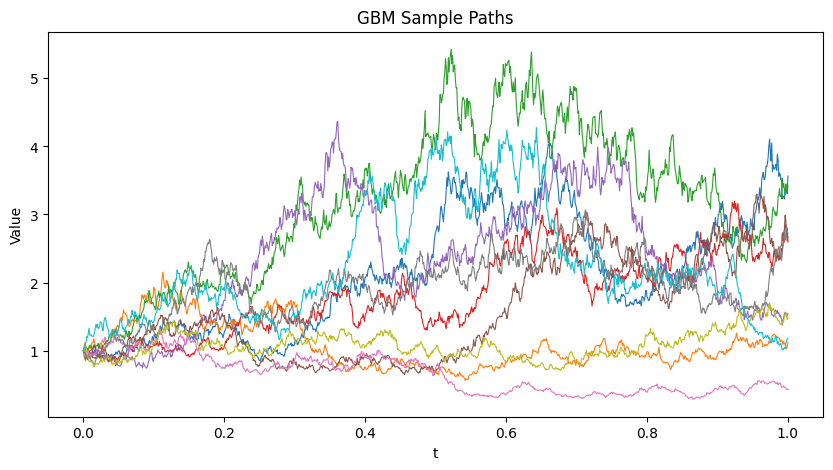

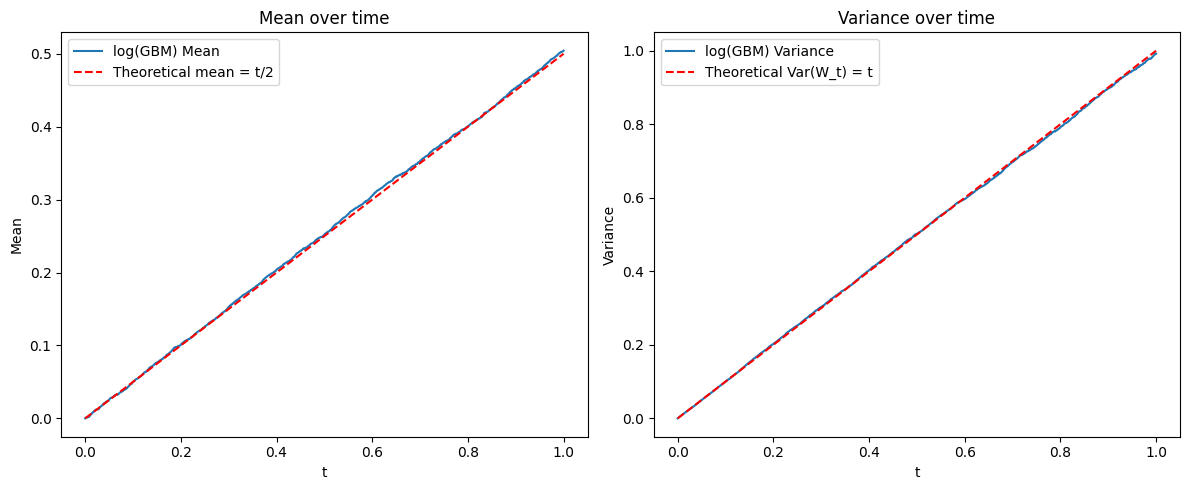

In [36]:
# --- Simulate BM and GBM ---
BM_t, BM_paths = sim_brownian(n_paths, T, dt)
GBM_t, GBM_paths = sim_gbm(n_paths, T, dt, mu=mu, sigma=sigma, S0=S0)

# --- Plot some sample paths ---
plot_sample_paths(GBM_t, GBM_paths, n_plot=10, title="GBM Sample Paths")

# --- Compare statistics: mean and variance ---
mean_GBM_log = np.mean(np.log(GBM_paths), axis=0)
var_GBM_log = np.var(np.log(GBM_paths), axis=0, ddof=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Mean over time
axes[0].plot(GBM_t, mean_GBM_log, label="log(GBM) Mean")
axes[0].plot(GBM_t, GBM_t/2, color='r', linestyle='--', label="Theoretical mean = t/2")
axes[0].set_title("Mean over time")
axes[0].set_xlabel("t")
axes[0].set_ylabel("Mean")
axes[0].legend()

# Variance over time
axes[1].plot(GBM_t, var_GBM_log, label="log(GBM) Variance")
axes[1].plot(GBM_t, GBM_t, 'r--', label="Theoretical Var(W_t) = t")
axes[1].set_title("Variance over time")
axes[1].set_xlabel("t")
axes[1].set_ylabel("Variance")
axes[1].legend()

plt.tight_layout()
plt.show()



Just plotted paths in time, now lets collapse the paths to a single terminination value $S_T$, to analyze the distribution of the GBM. ->

## Distribution of $\ln S_t$
### Empirical distribution

Sample mean(log S_T): 0.5042280311666638
Theoretical mean(log S_T): 0.5
Sample var(log S_T): 0.9923295617535832
Theoretical var(log S_T): 1.0


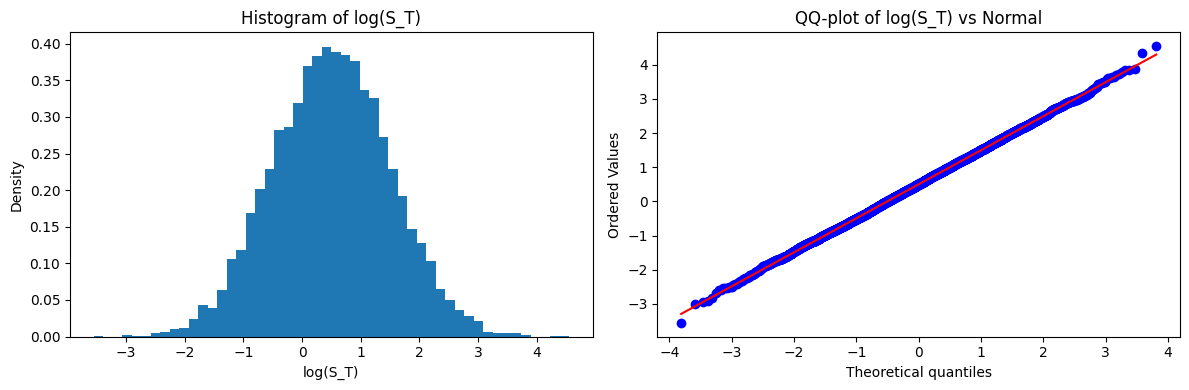

Normality test p-value: 0.586553299445271


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming you already have:
# GBM_paths, S0, mu, sigma, T, n_steps, dt

log_S_T = np.log(GBM_paths[:, -1])  # log of terminal GBM values

# 1) Compare sample mean/var of log(S_T) with theory
sample_mean = np.mean(log_S_T)
sample_var  = np.var(log_S_T, ddof=1)

theo_mean = np.log(S0) + (mu - 0.5 * sigma**2) * T
theo_var  = sigma**2 * T

print("Sample mean(log S_T):", sample_mean)
print("Theoretical mean(log S_T):", theo_mean)
print("Sample var(log S_T):", sample_var)
print("Theoretical var(log S_T):", theo_var)

# 2) Plot histogram and QQ-plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: histogram of log(S_T)
axes[0].hist(log_S_T, bins=50, density=True)
axes[0].set_xlabel("log(S_T)")
axes[0].set_ylabel("Density")
axes[0].set_title("Histogram of log(S_T)")

# Right: QQ-plot of log(S_T) vs normal
stats.probplot(log_S_T, dist="norm", plot=axes[1])
axes[1].set_title("QQ-plot of log(S_T) vs Normal")

plt.tight_layout()
plt.show()

# 3) Formal normality test (D’Agostino & Pearson)
k2, p_value = stats.normaltest(log_S_T)
print("Normality test p-value:", p_value)


Describe:
- Log normality in hist
- QQplot
- P value and what this implies

### Theoretical distribution
Why theory agrees
As we've seen before, $\log S_t$ is described by the following formula:
$$\ln S_t = \ln S_0 + (\mu - \frac{1}{2}\sigma^2)t + \sigma W_t$$

As noted in notebook01, where we analyzed the standard Brownian motion, we know from the definition that $W_t$ is surely normally distributed. In the standard geometric Brownian, we take $\mu$ and $\sigma$ as contstants. This means $\ln S_t$ is just a liniear function plus a Brownian motion. At a fixed t, this process is therefore normally distr with mean = $\ln S_0 + (\mu - \frac{1}{2}\sigma^2)t$, and var = $\sigma^2 t$

## Financial interpretation (returns vs log-returns)

In finance we often describe performance in terms of **returns**.

- The *simple* return over $[0,T]$ is  
  $$
  R_T = \frac{S_T - S_0}{S_0}.
  $$
- The **log-return** (continuously compounded return) is  
  $$
  x_T = \frac{1}{T}\ln\frac{S_T}{S_0}.
  $$

For small moves, $\ln(1 + R_T) \approx R_T$, so simple returns and
log-returns are numerically close. The key advantage of log-returns is
that they are **additive over time**: if $0 = t_0 < t_1 < \dots < t_n = T$,
then
$$
\ln\frac{S_T}{S_0}
  = \sum_{k=1}^n \ln\frac{S_{t_k}}{S_{t_{k-1}}}.
$$
The total log-return is just the sum of period log-returns.

Under geometric Brownian motion (GBM) we have
$$
\ln\frac{S_T}{S_0} \sim
\mathcal N\!\Big(\big(\mu - \tfrac{1}{2}\sigma^2\big)T,\; \sigma^2 T\Big),
$$
so our scaled log-return satisfies
$$
x_T = \frac{1}{T}\ln\frac{S_T}{S_0}
  \sim \mathcal N\!\left(\mu - \tfrac{1}{2}\sigma^2,\; \frac{\sigma^2}{T}\right).
$$

This is exactly what we see in the simulations of $x_1$ and $x_{20}$:
both distributions are centered near $\mu - \tfrac{1}{2}\sigma^2$, but
the variance shrinks like $\sigma^2/T$ as the horizon $T$ increases.
That variance scaling explains why long-horizon average returns look
more stable than short-horizon ones.

For readers who want the full derivation and the link to continuous
compounding, see **Appendix A** below.


In [38]:
# Simulation parameters:
number_simulations = 10000
number_steps = 1000

T_simulation_1 = 1
T_simulation_20 = 20

dt_1 = T_simulation_1 / number_steps
dt_2 = T_simulation_20 / number_steps

# GBM parameters:
mu = 1
sigma = 1
S0 = 1

# GBM simulations (now using T, dt and NOT number_steps in the call)
t1, gbm_simulation_T1 = sim_gbm(number_simulations, T_simulation_1, dt_1, mu=mu, sigma=sigma, S0=S0)
t2, gbm_simulation_T2 = sim_gbm(number_simulations, T_simulation_20, dt_2, mu=mu, sigma=sigma, S0=S0)

# Exctracting last values
S_T_1 = gbm_simulation_T1[:, -1]
S_T_20 = gbm_simulation_T2[:, -1]

# computing x_T
x_1 = np.log(S_T_1/S0)/T_simulation_1
x_20 = np.log(S_T_20/S0)/T_simulation_20


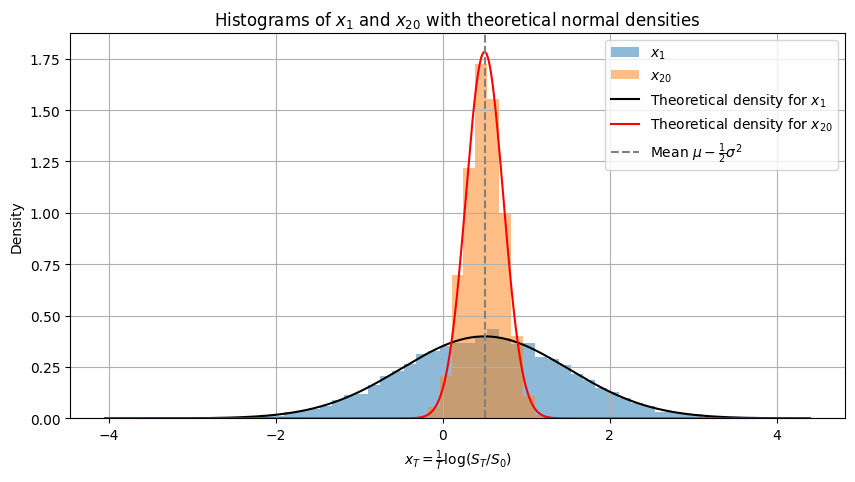

In [39]:
# Theoretical mean of x_T
theoretical_mean = mu - 0.5 * sigma**2

# Common bin range
xmin = min(x_1.min(), x_20.min())
xmax = max(x_1.max(), x_20.max())
bins = np.linspace(xmin, xmax, 60)

plt.figure(figsize=(10, 5))

# Histograms
plt.hist(x_1, bins=bins, density=True, alpha=0.5, label=r"$x_1$")
plt.hist(x_20, bins=bins, density=True, alpha=0.5, label=r"$x_{20}$")

# Grid for theoretical pdfs
x_grid = np.linspace(xmin, xmax, 400)

# Standard deviations for x_T
sigma_1 = sigma / np.sqrt(T_simulation_1)
sigma_20 = sigma / np.sqrt(T_simulation_20)

# Normal pdf function
def normal_pdf(x, mean, std):
    return 1.0 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((x - mean) / std)**2)

# Theoretical densities
pdf_1 = normal_pdf(x_grid, theoretical_mean, sigma_1)
pdf_20 = normal_pdf(x_grid, theoretical_mean, sigma_20)

plt.plot(x_grid, pdf_1, 'k-', label=r"Theoretical density for $x_1$")
plt.plot(x_grid, pdf_20, 'r-', label=r"Theoretical density for $x_{20}$")

# Vertical line at theoretical mean
plt.axvline(theoretical_mean, color='gray', linestyle='--',
            label=r"Mean $\mu - \frac{1}{2}\sigma^2$")

plt.xlabel(r"$x_T = \frac{1}{T}\log(S_T/S_0)$")
plt.ylabel("Density")
plt.title(r"Histograms of $x_1$ and $x_{20}$ with theoretical normal densities")
plt.legend()
plt.grid(True)
plt.show()


## Summary and next steps

## Appendix A: Continuous compounding and log-returns (derivation)

### From discrete compounding to continuous compounding

Suppose a stock earns a **constant** annual rate of return $r$,
compounded $n$ times per year. After $t$ years the price is

$$
S_t = S_0\left(1 + \frac{r}{n}\right)^{nt}.
$$

If we let the compounding frequency go to infinity ($n \to \infty$),
we obtain **continuous compounding**:

$$
S_t = S_0 e^{rt}.
$$

This motivates the definition of the **continuously compounded rate of
return** $x$ over $[0,t]$ as the (possibly random) number satisfying

$$
S_t = S_0 e^{x t}
\quad\Longleftrightarrow\quad
x = \frac{1}{t}\ln\frac{S_t}{S_0}.
$$

So $x$ is the constant continuously compounded rate that would produce
the same growth as the actual (possibly random) price process.

### Simple returns vs log-returns

The *simple* return over $[0,t]$ is

$$
R_t = \frac{S_t - S_0}{S_0}.
$$

Relating this to $x$, we have

$$
1 + R_t = \frac{S_t}{S_0} = e^{x t}
\quad\Longrightarrow\quad
R_t = e^{x t} - 1.
$$

Conversely,

$$
x = \frac{1}{t}\ln(1 + R_t).
$$

For **small** simple returns $R_t$, we can use the Taylor approximation
$\ln(1 + R_t) \approx R_t$, which gives

$$
x \approx \frac{R_t}{t}.
$$

This explains why, over short horizons and when price moves are small,
simple returns and log-returns are numerically very close.

### Time additivity of log-returns

A crucial property of log-returns is that they are **additive over time**.
Let $0 = t_0 < t_1 < \dots < t_n = T$. Then

$$
\frac{S_T}{S_0}
  = \frac{S_T}{S_{t_{n-1}}}
    \cdot \frac{S_{t_{n-1}}}{S_{t_{n-2}}}
    \cdots
    \frac{S_{t_1}}{S_0}.
$$

Taking logs,

$$
\ln\frac{S_T}{S_0}
  = \sum_{k=1}^n \ln\frac{S_{t_k}}{S_{t_{k-1}}}.
$$

If we define the log-return over $[t_{k-1}, t_k]$ by

$$
x_{t_k, t_{k-1}}
  = \frac{1}{t_k - t_{k-1}}
    \ln\frac{S_{t_k}}{S_{t_{k-1}}},
$$

then the **total** log-return over $[0,T]$ is a time-weighted average of
the period log-returns:

$$
\frac{1}{T}\ln\frac{S_T}{S_0}
  = \sum_{k=1}^n
      \frac{t_k - t_{k-1}}{T}\,
      x_{t_k, t_{k-1}}.
$$

This clean additivity is one of the main reasons log-returns are preferred
in models and in many statistical procedures.

### Distribution of log-returns under GBM

Under geometric Brownian motion (GBM),

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t,
$$

the solution is

$$
S_t = S_0 \exp\left(
    \left(\mu - \tfrac{1}{2}\sigma^2\right)t + \sigma W_t
\right).
$$

Taking logs and subtracting $\ln S_0$,

$$
\ln\frac{S_t}{S_0}
  = \left(\mu - \tfrac{1}{2}\sigma^2\right)t + \sigma W_t.
$$

Since $W_t \sim \mathcal N(0, t)$, this implies

$$
\ln\frac{S_t}{S_0}
  \sim \mathcal N\!\Big(
      \left(\mu - \tfrac{1}{2}\sigma^2\right)t,\;
      \sigma^2 t
  \Big).
$$

For the **scaled log-return**

$$
x_t = \frac{1}{t}\ln\frac{S_t}{S_0},
$$

we therefore obtain

$$
x_t \sim \mathcal N\!\left(
    \mu - \tfrac{1}{2}\sigma^2,\;
    \frac{\sigma^2}{t}
\right).
$$

So:

- The **mean** of $x_t$ is $\mu - \tfrac{1}{2}\sigma^2$, independent of $t$.
- The **variance** of $x_t$ is $\sigma^2 / t$, which **decreases** as the
  horizon $t$ increases.

In the notebook we verify this numerically by simulating many GBM paths,
computing $x_1$ and $x_{20}$, and plotting their histograms. Both
distributions are centered near the same mean
$\mu - \tfrac{1}{2}\sigma^2$, but the spread of $x_{20}$ is much
smaller than that of $x_1$, illustrating the variance scaling

$$
\operatorname{Var}(x_T) = \frac{\sigma^2}{T}.
$$

### Takeaways

- Log-returns correspond to **continuous compounding** and are naturally
  linked to the exponential solution of GBM.
- They are **additive over time**, which makes them very convenient for
  multi-period modelling.
- Under GBM, the scaled log-return $x_T$ is normal with variance
  $\sigma^2/T$, so average returns become more stable over longer
  horizons.
- These properties explain why log-returns are the standard choice in
  quantitative finance and in models such as Black–Scholes.
